In [1]:
# import required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import collections
import datetime as dt
import io

sns.set(style = 'darkgrid')

In [2]:
# import cleaned df
df = pd.read_csv('cleaner_df.csv')

# convert columns to correct types
timecols = ['start_time', 'end_time']
for column in timecols:
    df[column] = pd.to_datetime(df[column])
    
catcols = ['user_type', 'bike_share_for_all_trip', 'member_gender']    
for column in catcols:
    df[column] = df[column].astype('category')
    
# import stations df
stations_df = pd.read_csv('stations_df.csv')
stations_df = stations_df.set_index('id')


In [3]:
# check that df has been loaded correctly
df.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1916465 entries, 0 to 1916464
Data columns (total 17 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             1916465 non-null  int64         
 1   start_time               1916465 non-null  datetime64[ns]
 2   end_time                 1916465 non-null  datetime64[ns]
 3   start_station_id         1916465 non-null  int64         
 4   start_station_name       1916465 non-null  object        
 5   start_station_latitude   1916465 non-null  float64       
 6   start_station_longitude  1916465 non-null  float64       
 7   end_station_id           1916465 non-null  int64         
 8   end_station_name         1916465 non-null  object        
 9   end_station_latitude     1916465 non-null  float64       
 10  end_station_longitude    1916465 non-null  float64       
 11  bike_id                  1916465 non-null  int64         
 12  

## Requirement 5 - Add columns for Age, Age group, etc 

We will begin by adding in the suggested columns for Age and Age group

In [4]:
df['Age'] = df['start_time'].dt.year - df['member_birth_year']

# In order to add in the age_group column we will use the apply method associated with series. 
# To do this we must define a function that takes the age and return the age_group

def agegroup(age):
    """
    Function that converts age to a decade based age group
    
    Parameters
    -----
    age : numeric
        the age of the person/thing
    Returns
    -----
    string
        the decade group of the person/thing as a string
    """
    if type(age) == float and pd.isna(age):
        return
    else:
        lower_bound = 10 * (age // 10)
        upper_bound = lower_bound + 10
        group = "{} - {}".format(lower_bound, upper_bound)
        return group

df['Age_group'] = df['Age'].apply(agegroup)
df['Age_group'] = df['Age_group'].astype('category')

In [5]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,stationless,Age,Age_group
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male,Pre-2018,0,30.0,30.0 - 40.0
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female,Pre-2018,0,52.0,50.0 - 60.0
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,Unknown,Pre-2018,0,NaN,NaN
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,Unknown,Pre-2018,0,NaN,NaN
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female,Pre-2018,0,20.0,20.0 - 30.0


This seems to have been successful in introducing these new columns.

Additional columns will be introduced as they are deemed necessary for analysis.

## Requirement 6 - List the questions you can ask from the dataset

Univariate questions:
1. Where do people make their journeys?:
    1. What are the most common starting stations?
    3. What are the most common ending startions?
    2. What are the most common routes?

2. How much time are people spending on bikes?
    1. How does duration change between customers and subscribers?
    2. Can we distinguish cycles for pleasure from cycles for transport?

3. How are the rides of customers different to those of subscribers?
    1. Are there more common starting/ending locations for customers vs subscribers?
    2. Do customers tend to start their rides at a different time than subscribers?
    3. Can we train an algorithm to predict whether a ride is by a customer or a subscriber?
    4. How do 'bike_share_for_all' rides differ from others?
    
Bivariate questions:
1. When are people making their journeys?
    1. How does a rolling 7-day average for rides change over the course of the year?
    2. How does temperature affect the number of rides on a day (requires downloading an additional data set)?

2. How do age and duration relate?
    1. Is there any clear relationship between these variables?
    2. Is the relationship different for customers vs subscribers?
    
Additional questions:
1. Do men and women use the service in any noticeably distinct ways?
    1. How has the percentage of men / women using the service changed over time?
    2. Is the percentage of men / women amongst subscribers the same as it is for customers?
    3. Does the duration of rides differ between male and female riders?
    
2. What ages are the users?
    1. How are the ages of users different from customers to subcribers?
    
3. How has the usage of the bikes developed in the different areas (San Francisco, San Jose, Oakland)?


## Requirement 7 - Do your explanatory and exploratory analysis

I will not be using a number of columns for the coming analysis so these will be dropped from the data frame in order to speed up analysis.

In [6]:
cols_to_drop = ['start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'bike_id']
df = df.drop(cols_to_drop, axis = 1)

#### Requirement 7 - 1. Where do people make their journeys?:
    1. What are the most common starting stations?
    3. What are the most common ending startions?
    2. What are the most common routes?

We will begin by finding the top 10 starting stations.

In [7]:
top_stations_series = df.groupby('start_station_id').size().sort_values(ascending = False).head(10)
top_stations_series = top_stations_series.rename('journeys_started')

We can find the details of these stations by merging them back with the stations_df.

In [8]:
starting_points_df = stations_df.merge(top_stations_series, left_index = True, right_index = True)
starting_points_df = starting_points_df.sort_values('journeys_started', ascending = False)

# adding a columnn giving the propotion of total journeys from a given starting point
total_journeys = len(df)
starting_points_df['proportion_of_total_journeys'] = starting_points_df['journeys_started'] / total_journeys

starting_points_df

,common_name,common_lat,common_long,journeys_started,proportion_of_total_journeys
15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,44925,0.023442
6,The Embarcadero at Sansome St,37.804770,-122.403234,39630,0.020679
30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,39483,0.020602
67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,39013,0.020357
58,Market St at 10th St,37.776619,-122.417385,37403,0.019517
81,Berry St at 4th St,37.775880,-122.393170,36824,0.019215
21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,35824,0.018693
3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,33454,0.017456
16,Steuart St at Market St,37.794130,-122.394430,30868,0.016107
22,Howard St at Beale St,37.789756,-122.394643,30224,0.015771


The details of the most popular starting stations are given above. The most popular station counts for 2.3% of all the rides which is approximately 1 in 40. 

Similarly we can find the top 10 ending stations.

In [9]:
top_ending_series = df.groupby('end_station_id').size().sort_values(ascending = False).head(10)
top_ending_series = top_ending_series.rename('journeys_ended')

ending_points_df = stations_df.merge(top_ending_series, left_index = True, right_index = True)
ending_points_df = ending_points_df.sort_values('journeys_ended', ascending = False)

ending_points_df['proportion_of_total_journeys'] = ending_points_df['journeys_ended'] / total_journeys

ending_points_df

,common_name,common_lat,common_long,journeys_ended,proportion_of_total_journeys
15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,50993,0.026608
30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,50806,0.026510
67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,50007,0.026093
6,The Embarcadero at Sansome St,37.804770,-122.403234,47048,0.024549
21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,41185,0.021490
58,Market St at 10th St,37.776619,-122.417385,36044,0.018808
3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,35553,0.018551
81,Berry St at 4th St,37.775880,-122.393170,35543,0.018546
16,Steuart St at Market St,37.794130,-122.394430,30843,0.016094
5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,28249,0.014740


From the results above we can see that generally the same stations occur as the most popular starting stations and the most popular ending stations. The top 4 from both lists are the same (although in a different order) and 9 out of the 10 occur in both lists. 

Next we find the most common journeys taken.

In [10]:
journeys_groupby_list = ['start_station_id', 'end_station_id']
journeys_df = df.groupby(journeys_groupby_list, as_index = False).size().sort_values(by = 'size', ascending = False).head(20)


In [11]:
journeys_df = journeys_df.rename(columns = {'size' : 'journeys_between'})

journeys_df['proportion_of_total_journeys'] = journeys_df['journeys_between'] / total_journeys

journeys_with_start = journeys_df.reset_index().merge(stations_df, left_on = 'start_station_id', right_index = True)

journeys_with_start = journeys_with_start.rename(columns = {'common_name' : 'start_station_name'})

journeys = journeys_with_start.merge(stations_df, left_on = 'end_station_id', right_index = True)

journeys = journeys.rename(columns = {'common_name' : 'end_station_name'})
journeys = journeys.drop(['common_lat_x', 'common_long_x', 'common_lat_y', 'common_long_y'], axis = 1)
journeys.sort_values('journeys_between', ascending = False)

,index,start_station_id,end_station_id,journeys_between,proportion_of_total_journeys,start_station_name,end_station_name
1,1482,15,6,9599,0.005009,San Francisco Ferry Building (Harry Bridges Pl...,The Embarcadero at Sansome St
2,428,6,16,5516,0.002878,The Embarcadero at Sansome St,Steuart St at Market St
3,9188,81,15,5237,0.002733,Berry St at 4th St,San Francisco Ferry Building (Harry Bridges Pl...
4,427,6,15,4729,0.002468,The Embarcadero at Sansome St,San Francisco Ferry Building (Harry Bridges Pl...
5,19979,182,196,4209,0.002196,19th Street BART Station,Grand Ave at Perkins St
6,21277,196,182,3991,0.002082,Grand Ave at Perkins St,19th Street BART Station
7,1544,15,81,3954,0.002063,San Francisco Ferry Building (Harry Bridges Pl...,Berry St at 4th St
8,1628,16,6,3890,0.002030,Steuart St at Market St,The Embarcadero at Sansome St
9,21169,195,182,3444,0.001797,Bay Pl at Vernon St,19th Street BART Station
10,420,6,6,3295,0.001719,The Embarcadero at Sansome St,The Embarcadero at Sansome St


We can see here that the most popular routes are the routes between the most popular starting and ending points. 
There are some exceptions to this. These stand out particularly:

- 19th Street BART station to Grand Ave at Perkins St and vice versa
- Bay Pl at Vernon St to 19th Street BART Stations

Further analysis of these routes to see if they are completed more regularly by customers or subscribers would be interesting to complete. This will be looked at further in 7.3.

#### Requirement 7 - 2. How much time are people spending on bikes?
    1. How does duration change between customers and subscribers?
    2. Can we distinguish cycles for pleasure from cycles for transport?

We will begin comparing the ride duration of customers and subscribers using box plots. 
The number of outliers here makes the plots difficult to interpret and so these have been removed. 
The upper-most whisker thus only indicates the value 1.5 iqrs above the upper quartile. 

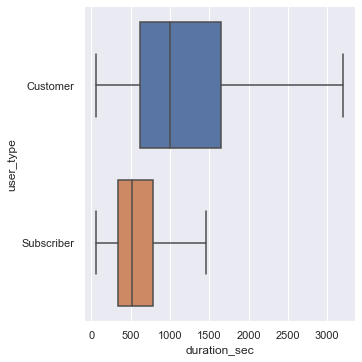

In [12]:
sns.catplot(x = 'duration_sec', y = 'user_type', data = df, kind = 'box', whis = 1.5, sym = '')

To give more specific values to this we can look at the descriptions of the ride durations for each group.

In [13]:
pd.DataFrame(group.describe().rename(columns={'duration_sec':name}).squeeze()
                         for name, group in df[['user_type', 'duration_sec']].groupby('user_type'))



,count,mean,std,min,25%,50%,75%,max
Customer,332075.0,2179.188171,5644.484614,61.0,613.0,1005.0,1648.0,86369.0
Subscriber,1584390.0,681.748881,1555.898537,61.0,335.0,519.0,784.0,86281.0


It is clear to see that customers' cycle rides last far longer in general than subscribers' rides. 
The fact that the min and max values are so similar for both suggest that there are limits set on the minimum and maximum time that a bike can be rented for. 

The simplest takeaway from these results is that subscribers tend to make shorter journeys - more likely for transport rather than for pleasure. Customers on the other hand make longer journeys suggesting that they are using the bikes more often for pleasure. 

The response to the 2nd question - whether it is possible to distinguish between pleasure rides and rides for purpose is extremely difficult without any labeled data with respect to these categories. 
Criteria relating to start point, end point, journey duration could prove useful here.

Instead we will begin by looking at a slighter different question. How do extended rides (those defined as more than 3 times longer than the fastest 1% of rides) differ between subsribers and customers?

In [14]:
def percentile(n):
    """
    Takes a percentile and returns a function that returns that percentile of a given set of data
    This is used to get round the problem caused by groupby
    
    Parameters
    -----
    n : int
        the percentile that you want the returned function to find
        
    Returns
    -----
    function
        a function that finds the given percentile"""
    def percentile_(x):
        return np.percentile(x, n)
    return percentile_

In [15]:
df['quick_time_for_route'] = df.groupby(['start_station_id', 'end_station_id'])['duration_sec'].transform(percentile(1))
df['extended_ride'] = df['duration_sec'] > 3*df['quick_time_for_route']

This has allowed us to have a clear column for extended rides without having to go via grouped tables. 
Now we can look at how these extended rides differ between customers to subsrcibers.

In [16]:
print('The total percentage of extended rides:', np.mean(df['extended_ride']))

print('\nPercentage of extended rides by user type: \n\n ', df.groupby('user_type')['extended_ride'].agg(np.mean))

The total percentage of extended rides: 0.10748800525968384

Percentage of extended rides by user type: 

  user_type
Customer      0.354013
Subscriber    0.055818
Name: extended_ride, dtype: float64


So there is a clear distinction between the percentage of subscribers taking extended rides and the percentage of customers taking them. In fact if we add the idea of a slightly_extended ride (one that is more than twice as long as a quick ride then we got an even greater distinction between subscribers and customers.

In [17]:
df['slightly_extended_ride'] = df['duration_sec'] > 2*df['quick_time_for_route']
df.groupby('user_type')['slightly_extended_ride'].agg(np.mean)

user_type
Customer      0.555742
Subscriber    0.151764
Name: slightly_extended_ride, dtype: float64

This shows us that 55% of customer rides fit the definition of slightly extended whilst only 15% of subscriber rides do. 

It would also be interesting to look at this with respect to starting time of rides and day of the week.
To do this we will add columns to the df telling us whethter the ride took place on a weekday and whether the ride took place during rush hours (7 - 10 am, 16 - 19 pm). 

In [18]:
df['weekday'] = df['start_time'].dt.weekday

def rush_hour_time(x):
    """
    This function decides whether or not a time is within rush hours.
    """
    return (x.dt.hour).between(7, 10) | (x.dt.hour).between(16, 19)

df['rush_hour'] = df['weekday'].between(0,5) & rush_hour_time(df['start_time'])

In [19]:
df.groupby('weekday')['extended_ride'].agg(np.mean)

weekday
0    0.084629
1    0.072698
2    0.075114
3    0.079519
4    0.098729
5    0.221008
6    0.226335
Name: extended_ride, dtype: float64

Here we see a clear distinction between the number of slower rides taking place on the weekends compared to those on the weekdays. The expectation with traffic on roads is that it would decrease at the weekend (maybe this is incorrect) but this does suggest a more leisurely approach to cycling on the weekends. 

In [20]:
df.groupby('weekday')['slightly_extended_ride'].agg(np.mean)

weekday
0    0.185248
1    0.171849
2    0.174767
3    0.183107
4    0.210152
5    0.390340
6    0.388974
Name: slightly_extended_ride, dtype: float64

Again, when looking at slightly extended rides the difference is still apparent with almost 40% of rides on weekends being slightly extended and only around 20% on average on weekdays.

We can complete a simlar analysis on rides that take place in and out of rush hour times.

In [21]:
df.groupby('rush_hour')['extended_ride'].agg(np.mean)

rush_hour
False    0.170380
True     0.066116
Name: extended_ride, dtype: float64

Here we see that 17% of rides that begin outside of rush hours are extended compared to only 7% in rush hours.

In [22]:
df.groupby('rush_hour')['slightly_extended_ride'].agg(np.mean)

rush_hour
False    0.308725
True     0.164557
Name: slightly_extended_ride, dtype: float64

Similarly 31% of rides outside of rush hours are slightly extended whereas only 16% of rush hour rides are.

From this analysis we can see that fewer rides around the time of rush hour tend to be extended. 


Looking at these with respect to customers and subscribers would be interesting as well.

In [23]:
df.pivot_table(values = 'extended_ride', columns = 'user_type', index = 'rush_hour', aggfunc = np.mean)

user_type,Customer,Subscriber
rush_hour,,
False,0.422738,0.087975
True,0.265218,0.037587


In [24]:
df.pivot_table(values = 'extended_ride', columns = 'user_type', index = 'weekday', aggfunc = np.mean)

user_type,Customer,Subscriber
weekday,,
0,0.324513,0.048175
1,0.282350,0.044271
2,0.280259,0.045768
3,0.286769,0.047377
4,0.331803,0.053717
5,0.438929,0.102170
6,0.449673,0.107495


These tables reveal clear distinctions in the way that Customers and Subscribers use their rides. Customers are much more likely to be using the cycles for extended rides than subscribers, irrespective of whether or not the bike is hired during rush hour, and of whether or not the bike is hired during the weekend. 

Finally, I would like to look at extended rides by route, to see if there are any stations that have a particularly high frequency of extended routes. 

In [25]:
extended_ride_by_route = df.groupby(['start_station_id', 'end_station_id'])[['slightly_extended_ride', 'extended_ride']].mean().reset_index()

I will now look at these rates in relation to the most popular routes that are taken. 

In [26]:
journeys_df = journeys_df.reset_index()
extended_journeys = journeys_df.merge(extended_ride_by_route, on = ['start_station_id', 'end_station_id'])

# we want to remove cases in which bikes are rented and returned to the same station as a high proportion of these rides will be extended
# due to the fact that they are clearly not being used for transport
extended_journeys_different_stations = extended_journeys[extended_journeys['start_station_id'] != extended_journeys['end_station_id']]
extended_journeys_different_stations.sort_values('extended_ride', ascending = False).head()

,index,start_station_id,end_station_id,journeys_between,proportion_of_total_journeys,slightly_extended_ride,extended_ride
1,1482,15,6,9599,0.005009,0.495989,0.379935
4,427,6,15,4729,0.002468,0.425248,0.197082
8,1628,16,6,3890,0.002030,0.271722,0.142674
17,24993,243,245,2866,0.001495,0.290300,0.077111
12,5747,50,15,3178,0.001658,0.158905,0.068282


This table presents the routes ordered by the proportion of rides that are on that route that are extended.
We can see a lot of the same routes that we saw as being the most popular in our earlier analysis are also occuring as the most likely to be completed in an extended time.

The proportion of extended rides clearly changes from route to route, between user_type and depending on the day and time. 

If we were  given a sample of labeled data than we could try to develop this analysis further in an attempt to distinguish between those using the bicycles as a leisure pursuit and those using them strictly for transport. My undestanding of unsupervised machine learning is not developed enough to say whether such methods could identify groups of rides that would roughtly correspond to leisure rides and transport rides but I feel that the answer is no.

#### Requirement 7.3 - How are the rides of customers different to those of subscribers?

1. Are there more common starting/ending locations for customers vs subscribers?
2. Do customers tend to start their rides at a different time than subscribers?
3. How do 'bike_share_for_all' rides differ from others?

We have already seen partial answers to these questions above. However we will try to address them more fully here.

The first step is to create a table with the percentage of total journeys that each route represents for customers and subscribers. 

In [27]:
df_customers = df[df['user_type'] == 'Customer'].copy()
df_subscribers = df[df['user_type'] == 'Subscriber'].copy()

In [28]:
customer_rides = len(df_customers)
def prop_customer_rides(x):
    """
    This function will be used as part of a groupby method to give the proportion of rides
    made up by each route
    """
    return len(x) / customer_rides

In [29]:
# this uses the function defined above to find the percentage of customer journeys that each route makes up
customer_routes = df_customers.groupby(['start_station_id', 'end_station_id'], as_index = False).agg({'duration_sec' : prop_customer_rides}).sort_values('duration_sec', ascending = False)

# this just renames columns to a more relatable name
customer_routes = customer_routes.rename(columns = {'duration_sec' : 'percentage_of_journeys'})

# we can then find the popularity rank of each route
customer_routes['customer_popularity_rank'] = customer_routes['percentage_of_journeys'].rank(ascending = False)

This is the same process for subscribers. 

In [30]:
subscriber_rides = len(df_subscribers)
def prop_subscriber_rides(x):
    return len(x) / subscriber_rides

subscriber_routes = df_subscribers.groupby(['start_station_id', 'end_station_id'], as_index = False).agg({'duration_sec' : prop_subscriber_rides}).sort_values('duration_sec', ascending = False)

subscriber_routes = subscriber_routes.rename(columns = {'duration_sec' : 'percentage_of_journeys_for_subscribers'})
subscriber_routes['subscriber_popularity_rank'] = subscriber_routes['percentage_of_journeys_for_subscribers'].rank(ascending = False)

We can then compare these two rankings to compare the popularity of different routes for customers and subscribers.

In [31]:
routes_popularity = subscriber_routes.merge(customer_routes, on = ['start_station_id', 'end_station_id'])
display(routes_popularity.sort_values('customer_popularity_rank', ascending = True).head(10))

display(routes_popularity.sort_values('subscriber_popularity_rank', ascending = True).head(10))

,start_station_id,end_station_id,percentage_of_journeys_for_subscribers,subscriber_popularity_rank,percentage_of_journeys,customer_popularity_rank
1,15,6,0.003216,2.0,0.013560,1.0
343,6,6,0.000362,345.0,0.008194,2.0
0,0,0,0.004469,1.0,0.008004,3.0
822,15,15,0.000201,830.0,0.005420,4.0
10,6,15,0.001875,11.0,0.005297,5.0
458,70,70,0.000299,462.0,0.005234,6.0
942,8,6,0.000186,947.0,0.004848,7.0
1180,197,197,0.000156,1181.5,0.003578,8.0
817,3,6,0.000203,818.5,0.003063,9.0
208,15,8,0.000495,209.0,0.002816,10.0


,start_station_id,end_station_id,percentage_of_journeys_for_subscribers,subscriber_popularity_rank,percentage_of_journeys,customer_popularity_rank
0,0,0,0.004469,1.0,0.008004,3.0
1,15,6,0.003216,2.0,0.013560,1.0
2,6,16,0.003155,3.0,0.001560,24.0
3,81,15,0.002941,4.0,0.001738,22.0
4,182,196,0.002377,5.0,0.001334,31.0
5,196,182,0.002337,6.0,0.000867,72.0
6,15,81,0.002221,7.0,0.001310,33.5
7,195,182,0.002109,8.0,0.000307,377.0
8,16,6,0.002050,9.0,0.001933,16.0
9,58,67,0.001883,10.0,0.000684,101.5


This table highlights the differing popularity of routes for subscribers vs customers. 
The most striking result is the difference in popularity of returning a bike to the same station as it began. 
Moreover we can see that some routes that are popular within one group are far less popular with another. 
The journey from statoin 8 to station 6 is the 3rd most popular non-circular route with customers but is the 947th most popular with subscribers. 
On the other hand the journey from 195 to 182 is the 8th most popular for subscribers but the 377th most popular for customers. 

It would be interesting to analyse the extent to which the routes for subscribers map onto commuter routes but this goes beyond the scope of the investigation. 

Moving onto the second question, we can look at the starting time of the routes by adding a new column for starting hour. 
We will separate this for weekdays and weekends as the usage has been shown to be significantly different within these different times.

In [32]:
df['start_hour'] = df['start_time'].dt.hour
df['weekend'] = ~df['weekday'].between(0,5)
df['time_in_day'] = df['start_time'].dt.hour + df['start_time'].dt.minute / 60.0


We can then look at how the number of rides that start in each hour change between customers and subscribers and whether or not the day is on a weekend.

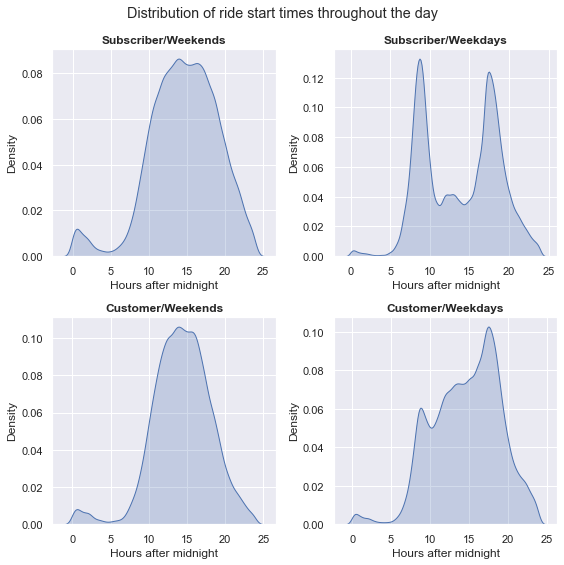

In [33]:
fig_rides_by_time, ax_rides_by_time = plt.subplots(nrows = 2, ncols = 2, figsize = (8, 8), tight_layout = True)

user_types = ['Subscriber', 'Customer']
truth = [True, False ]


for i in [0, 1]:
    for j in [0, 1]:
        sns.kdeplot(data = df[(df['user_type'] == user_types[i]) & (df['weekend'] == truth[j])], x = 'time_in_day', ax = ax_rides_by_time[i][j], fill = True)
        ax_rides_by_time[i][j].set_xlabel('Hours after midnight')
        
        day_type = 'Weekdays'
        if truth[j]:
            day_type = 'Weekends'
        ax_rides_by_time[i][j].set_title('{}/{}'.format(user_types[i], day_type), weight = 'bold', size = 'medium')

fig_rides_by_time.suptitle('Distribution of ride start times throughout the day')

fig_rides_by_time.savefig('Distribution_of_ride_start_times_throughout_the_day')

We can see that the general shape for customers and subscribers is the same for weekends, with the number of rides increasing to a peak at about 14:00 for subsrcibers and around then decreasing to steadily until about 05:00 where they begin to rise again. 

Weekdays for subscribers fit with the idea of bikes being used for commuting. There are peaks around the rush hours 09:00 and 17:00 as one would expect with commuter traffic.
Cusstomers' use generally increased steadidly (with the exception of a mini-peak at 09:00) until 17:00 pm where it reacehes its peak.

We will now look at Bike_share_for_all users and compare them against other users. 

In [34]:
df.pivot_table(values = 'duration_sec', index = 'user_type', columns = 'bike_share_for_all_trip', aggfunc = len, fill_value = 0)

bike_share_for_all_trip,No,Pre-2018,Yes
user_type,,,
Customer,221605,110470,0
Subscriber,1057585,409230,117575


We can see that all bike_share_for_all users are subscribers.

In [35]:
df.pivot_table(values = 'duration_sec', index = 'weekend', columns = 'bike_share_for_all_trip', aggfunc = len, fill_value = 0)

bike_share_for_all_trip,No,Pre-2018,Yes
weekend,,,
False,1173942,474309,105504
True,105248,45391,12071


Can see here that the vast majority of bike_share_for_all rides occur on working days (even factoring in the fact that there are more working days than weekend days).

We can produce a similar analysis of the times of these rentals to the analysis completed above.

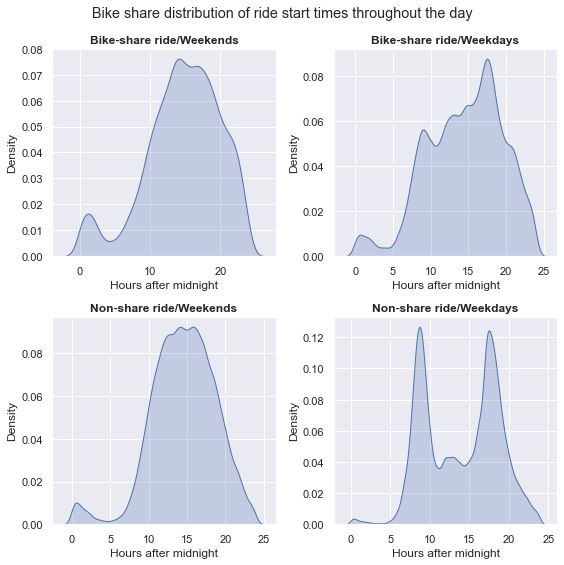

In [36]:
fig_rides_by_time_bs, ax_rides_by_time_bs = plt.subplots(nrows = 2, ncols = 2, figsize = (8, 8), tight_layout = True)

bs_options = ['Yes', 'No']
truth = [True, False ]
bs_titles = ['Bike-share ride', 'Non-share ride']

for i in [0, 1]:
    for j in [0, 1]:
        sns.kdeplot(data = df[(df['bike_share_for_all_trip'] == bs_options[i]) & (df['weekend'] == truth[j])], x = 'time_in_day', ax = ax_rides_by_time_bs[i][j], fill = True)
        ax_rides_by_time_bs[i][j].set_xlabel('Hours after midnight')
        
        day_type = 'Weekdays'
        if truth[j]:
            day_type = 'Weekends'
        ax_rides_by_time_bs[i][j].set_title('{}/{}'.format(bs_titles[i], day_type), weight = 'bold', size = 'medium')

fig_rides_by_time_bs.suptitle('Bike share distribution of ride start times throughout the day')

fig_rides_by_time_bs.savefig('Bike_share_distribution_of_ride_start_times_throughout_the_day')

We can see that bike_share_for_all users act like most users on weekends and that their weekday use is closer to that of customers than of other subscribers.

We can also compare the duration of bike_share_for_all rides to those of customers and subscribers to see how these different (overlapping) groups align. 

In [37]:
pd.DataFrame(group.describe().rename(columns={'duration_sec':name}).squeeze()
                         for name, group in df[['user_type', 'duration_sec']].groupby('user_type'))

,count,mean,std,min,25%,50%,75%,max
Customer,332075.0,2179.188171,5644.484614,61.0,613.0,1005.0,1648.0,86369.0
Subscriber,1584390.0,681.748881,1555.898537,61.0,335.0,519.0,784.0,86281.0


In [38]:
pd.DataFrame(group.describe().rename(columns={'duration_sec':name}).squeeze()
                         for name, group in df[['bike_share_for_all_trip', 'duration_sec']].groupby('bike_share_for_all_trip'))

,count,mean,std,min,25%,50%,75%,max
No,1279190.0,892.606501,2565.690663,61.0,357.0,566.0,888.0,86366.0
Pre-2018,519700.0,1099.009521,3444.146451,61.0,382.0,596.0,938.0,86369.0
Yes,117575.0,772.625677,1904.397343,61.0,303.0,491.0,790.0,86142.0


The duration of bike_share_for_all users is closely related to that of subsrcibers in general. The mean time is slightly higher for bike_shares and the median is slightly smaller. This, as well as the higher upper_quartile suggests that the durations are more positively skewed than the subscribers in total.

#### Requirement 7 - 4 When are people making their journeys?

1. How does a rolling 7-day average for rides change over the course of the year?
2. How does temperature affect the number of rides on a day (requires downloading an additional data set)?

In [39]:
df['date'] = df['start_time'].dt.date
rides_by_day = df.groupby('date').size()

Text(0, 0.5, 'Rolling 7-day average number of rides')

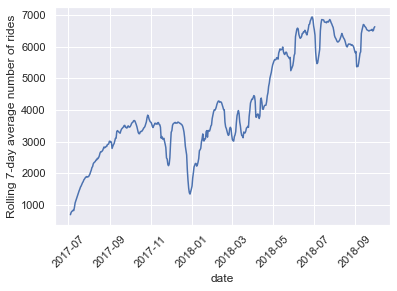

In [40]:
rides_by_day.rolling(window = 7).mean().plot()
plt.xticks(rotation = 45)
plt.ylabel('Rolling 7-day average number of rides')

This seems to show that the popularity of the bike rental system has been increasing progressively since data began being collected in July 2017. There are some periods where the data drops significantly, notably around the Christams period, but this slowly recovers so that by March the data is at the same level as in October. 
If this data were to be collected over more years it would be interesting to look at the number of rides changes in colder months. 
We could also analyse this by importing temperature data for the dates being considered but this has proved challenging to find. 

Unfortunately this has prevented any good answer to question 2.

Having seen the difference in weekend and weekday use above it is worth asking the question how the number of rides has changed over time whilst separating for user types and weekend/weekday uses. 

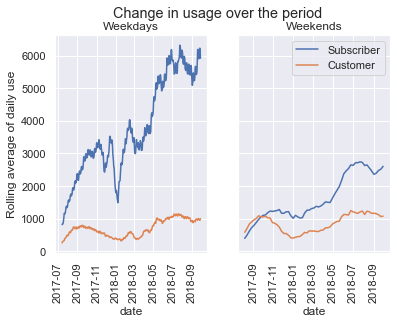

In [41]:
fig, ax = plt.subplots(ncols = 2, sharey = True)


rides_by_day_subscriber_weekday = df[(df['user_type'] == 'Subscriber') & (df['weekend'] == False)].groupby('date').size()
rides_by_day_subscriber_weekday.rolling(window = 15).mean().plot(ax = ax[0], label = 'Subscriber')


rides_by_day_customer_weekday = df[(df['user_type'] == 'Customer') & (df['weekend'] == False)].groupby('date').size()
rides_by_day_customer_weekday.rolling(window = 15).mean().plot(ax = ax[0], label = 'Customer')


rides_by_day_subscriber_weekend = df[(df['user_type'] == 'Subscriber') & df['weekend']].groupby('date').size()
rides_by_day_subscriber_weekend.rolling(window = 6).mean().plot(ax = ax[1], label = 'Subscriber')


rides_by_day_customer_weekend = df[(df['user_type'] == 'Customer') & df['weekend']].groupby('date').size()
rides_by_day_customer_weekend.rolling(window = 6).mean().plot(ax = ax[1], label = 'Customer')

ax[0].tick_params(axis = 'x', labelrotation = 90)
ax[1].tick_params(axis = 'x', labelrotation = 90)
ax[1].legend()
ax[0].set_ylabel('Rolling average of daily use')

fig.suptitle('Change in usage over the period')
ax[0].set_title('Weekdays')
ax[1].set_title('Weekends')

fig.savefig('Change_in_usage_over_the_period')

#### Reuqirement 7 - 5 How do age and duration relate?

1. Is there any clear relationship between these variables?
2. Is the relationship different for customers vs subscribers?

In [42]:
duration_by_age = df.groupby(['Age', 'user_type'])['duration_sec'].mean().to_frame('mean_ride_duration_sec').reset_index()

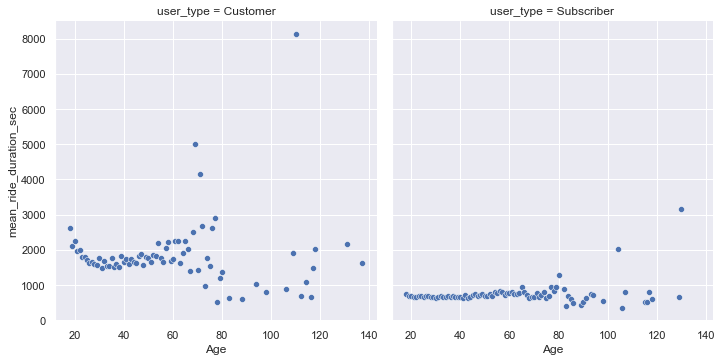

In [43]:
sns.relplot(x = 'Age', y = 'mean_ride_duration_sec', data = duration_by_age, col = 'user_type')

This reveals a number of interesting feaures of the data. 
Firstly, there are clearly a large number of incorretly entered birth_years as there are a number of uses over 100. This may be intentional or accidental misuse on the part of the users or errors in data handling. 

Secondly, the relationship between duration and age is generally similar across subscribers and customers. 
In the case of subscribers, the mean duration does not change significantly from the age of 20 to 80. Between 80 and 86 the mean duration decreases and then increases up to the age of 95, before losing any recognisable pattern.

In the case of customers the mean duration decreases slighly from 20 to 30 and then slowly climbs until the age of 60 at which point it begins to lose any clear pattern. There is a definite decrease in mean from 60 to 80 and the mean then starts to recover. 

It may be easier to note changes using boxplots for each age group.

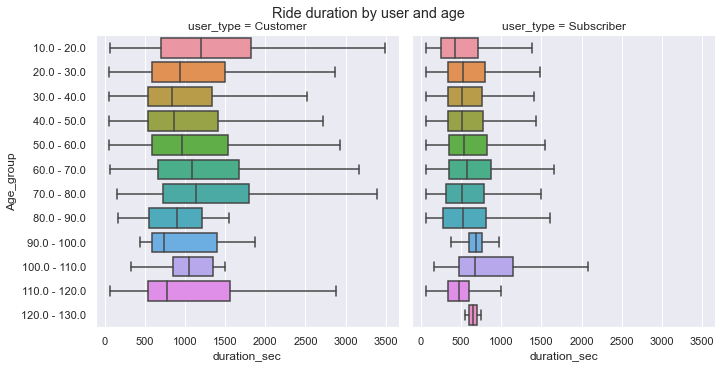

In [44]:
# this ensures that the boxplots occur in the desired order
order = ['{} - {}'.format(float(n*10), float((n+1)*10)) for n in range(1, 13)]
rp2 = sns.catplot(x = 'duration_sec', y = 'Age_group', col = 'user_type', data = df, kind = 'box', whis = 1.5, sym = '', order = order)

rp2.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
rp2.fig.suptitle('Ride duration by user and age')

rp2.fig.savefig('ride_duration_by_user_and_age')

These tell a similar story to the plots by Age although the changes in the duration of customer rides is more pronounced here. 
you can clearly see a reduction in average duration until the 30 - 50 area and then a steady increasing until the 80 - 90 area.

#### Requirement 7 - 6 Do men and women use the service in any noticeably distinct ways?

1. How has the percentage of men / women / other using the service changed over time?
2. Is the percentage of men / women / other amongst subscribers the same as it is for customers?
3. Does the duration of rides differ between male,female and other riders?

In [45]:
df['member_gender'].value_counts()

Male       1303335
Female      428644
Unknown     158080
Other        26406
Name: member_gender, dtype: int64

We can see here that the vast majority of rides were completed by males.

In order to make the analysis easier we will create a new dataset only including rows that contain data on the member_gender. 

In [46]:
gendered_rides = df[df['member_gender'] != 'Unknown'].copy()
gendered_rides['member_gender'] = gendered_rides['member_gender'].cat.remove_categories(['Unknown'])

We can then look at how the number of males, females and others changers over time.

(array([17348., 17410., 17471., 17532., 17591., 17652., 17713., 17775.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

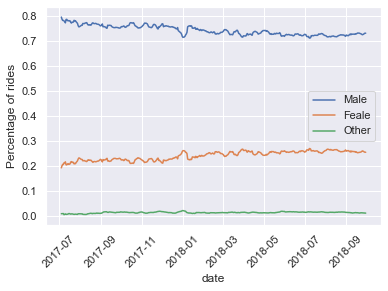

In [47]:
gendered_rides['Male'] = gendered_rides['member_gender'] == 'Male'
gendered_rides['Female'] = gendered_rides['member_gender'] == 'Female'
gendered_rides['Other'] = gendered_rides['member_gender'] == 'Other'

gender_percentage_by_day = gendered_rides.groupby('date')[['Male', 'Female', 'Other']].mean()

gender_percentage_by_day['Male'].rolling(window = 7).mean().plot(label = 'Male')
gender_percentage_by_day['Female'].rolling(window = 7).mean().plot(label = 'Feale')
gender_percentage_by_day['Other'].rolling(window = 7).mean().plot(label = 'Other')
plt.legend()
plt.ylabel('Percentage of rides')
plt.xticks(rotation = 45)


We can see here that the percentage of rides by females has been generally increasing since the start of recorded data. 

We can compare the specific values by looking at the head and tail of the rolling averages.

In [48]:
gender_percentage_by_day['Female'].rolling(window = 7).mean().head(10)

date
2017-06-28         NaN
2017-06-29         NaN
2017-06-30         NaN
2017-07-01         NaN
2017-07-02         NaN
2017-07-03         NaN
2017-07-04    0.193774
2017-07-05    0.202286
2017-07-06    0.207530
2017-07-07    0.206906
Name: Female, dtype: float64

In [49]:
gender_percentage_by_day['Female'].rolling(window = 7).mean().tail(10)

date
2018-09-21    0.255852
2018-09-22    0.256769
2018-09-23    0.256854
2018-09-24    0.259006
2018-09-25    0.261401
2018-09-26    0.260437
2018-09-27    0.258898
2018-09-28    0.256621
2018-09-29    0.256221
2018-09-30    0.255920
Name: Female, dtype: float64

Here we can see that the average has increased from around 20% each day at the start of the records to around 25% each day by the end of the records. 

Let us now look at how the percentage of riders of each gender changes between subscribers and customers.

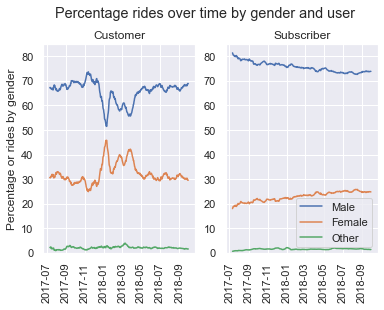

In [66]:
# create a data frame with the percentage of rides for gender for each day
gender_rides_by_day_and_users = gendered_rides.groupby(['date', 'member_gender', 'user_type']).size().to_frame('Number_of_rides').reset_index()

# add a column for percentage of rides for each date and user_type
gender_rides_by_day_and_users['Percentage_of_rides'] = gender_rides_by_day_and_users.groupby(['date', 'user_type'])['Number_of_rides'].transform(lambda x: 100 * x / sum(x))

# turn this into a rolling average over the past 7 days to account for peaks at weekends
gender_rides_by_day_and_users['Rolling_average'] = gender_rides_by_day_and_users.groupby(['member_gender', 'user_type'])['Percentage_of_rides'].transform(lambda s: s.rolling(14).mean())

# plot these on a single axis
(fig_users_gender, ax_users_gender) = plt.subplots(nrows = 1, ncols = 2)


user_types = ['Customer', 'Subscriber']
genders = ['Male', 'Female', 'Other']

for i in [0, 1]:
    for j in [0, 1, 2]:
        df_for_plot = gender_rides_by_day_and_users[(gender_rides_by_day_and_users['user_type'] == user_types[i]) & (gender_rides_by_day_and_users['member_gender'] == genders[j])]
        y = df_for_plot['Rolling_average']
        x = df_for_plot['date']
        ax_users_gender[i].plot(x, y, label = genders[j])
    plt.sca(ax_users_gender[i])
    plt.xticks(rotation=90)
    ax_users_gender[i].title.set_text(user_types[i])
    ax_users_gender[i].set_ylim([0, 85])
    
plt.legend()
ax_users_gender[0].set_ylabel('Percentage or rides by gender')

fig_users_gender.subplots_adjust(top=0.85) # adjust the Figure in rp
fig_users_gender.suptitle('Percentage rides over time by gender and user')

plt.show()

fig_users_gender.savefig('Percentage_rides_over_time_by_gender_and_user')


We can see here that the percentage of customers' rides that are female has always been significantly higher than the percentage of subscribers' rides that are female. 
The percentage of customers's rides that are female also seems to fluctuate significantly more than in the case of subscribers. 

Let us also look at how the overall number of rides by different genders has changed over time. 


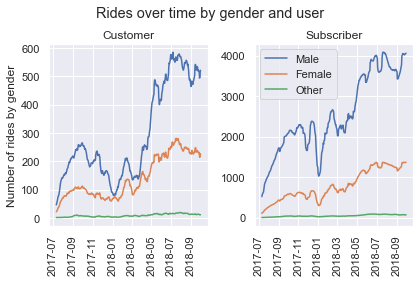

In [65]:
# add a column for rolling 7 day average (as oppsed to percentage)
gender_rides_by_day_and_users['Rolling_average_total_rides'] = gender_rides_by_day_and_users.groupby(['member_gender', 'user_type'])['Number_of_rides'].transform(lambda s: s.rolling(14).mean())

# plot these on a single axis
(fig_users_gender_totals, ax_users_gender_totals) = plt.subplots(nrows = 1, ncols = 2)


user_types = ['Customer', 'Subscriber']
genders = ['Male', 'Female', 'Other']

for i in [0, 1]:
    for j in [0, 1, 2]:
        df_for_plot = gender_rides_by_day_and_users[(gender_rides_by_day_and_users['user_type'] == user_types[i]) & (gender_rides_by_day_and_users['member_gender'] == genders[j])]
        y = df_for_plot['Rolling_average_total_rides']
        x = df_for_plot['date']
        ax_users_gender_totals[i].plot(x, y, label = genders[j])
    plt.sca(ax_users_gender_totals[i])
    plt.xticks(rotation=90)
    ax_users_gender_totals[i].title.set_text(user_types[i])
    
plt.legend()
ax_users_gender_totals[0].set_ylabel('Number of rides by gender')

fig_users_gender_totals.tight_layout()

fig_users_gender_totals.subplots_adjust(top=0.85) # adjust the Figure in rp
fig_users_gender_totals.suptitle('Rides over time by gender and user')


plt.show()

fig_users_gender_totals.savefig('Rides_over_time_by_gender_and_user')


Now let us look at how the duration of rides relates to the gender of the rider. 

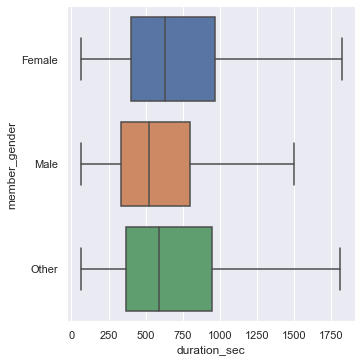

In [52]:
sns.catplot(x = 'duration_sec', y = 'member_gender', data = gendered_rides, kind = 'box', whis = 1.5, sym = '')

Here we can see that females tend to spend longer on rides then men and that others spend approximately the same amount of time on the bikes as females. It will be interesting to see later if this is caused by there being a higher ratio of customers to subscribers in the female users. 

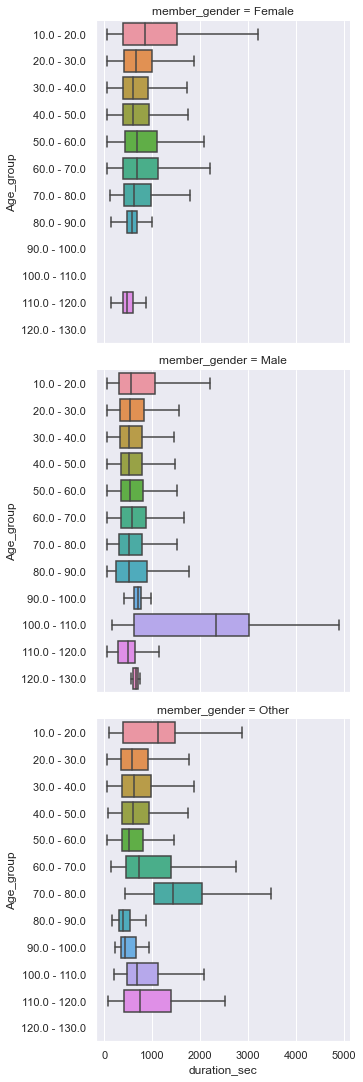

In [53]:
sns.catplot(x = 'duration_sec', y = 'Age_group', row = 'member_gender', data = gendered_rides, kind = 'box', whis = 1.5, sym = '', order = order)

The same pattern of consistency across age groups is demonstrated in all of these graphs. 
In each case those below the age of 20 tend to be cycling for longer than the age groups just above them. 
Again, data for higher age groups is more erratic, most likley because of incorrect insertions of birth year.

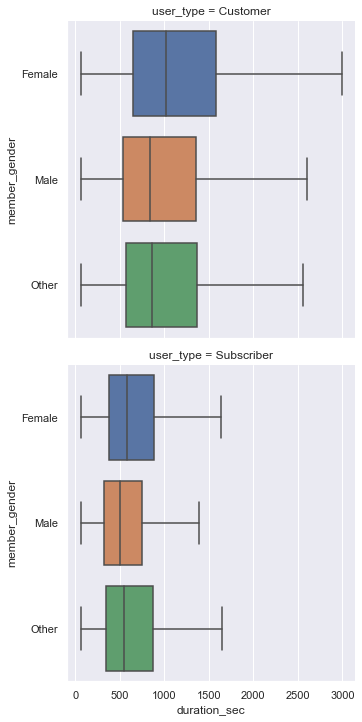

In [54]:
sns.catplot(x = 'duration_sec', y = 'member_gender', row = 'user_type', data = gendered_rides, kind = 'box', whis = 1.5, sym = '')

Before we analyse this let us look at the exact values below.

In [55]:
# create a list of aggfunctions to apply to the duration
aggfunctions = [lambda x: np.percentile(x, 10), lambda x: np.percentile(x, 25), lambda x: np.percentile(x, 50), lambda x: np.percentile(x, 75), lambda x: np.percentile(x, 90), np.mean, np.std]



grouped_percentiles = gendered_rides.groupby(['user_type', 'member_gender'])['duration_sec'].agg(aggfunctions)

grouped_percentiles.rename(columns = {'<lambda_0>': '10th percentile', '<lambda_1>': '25th percentile', '<lambda_2>' : '50th percentile', '<lambda_3>' : '75th percentile', '<lambda_4>' : '90th percentile'})

10th percentile  25th percentile  50th percentile  \
user_type  member_gender                                                      
Customer   Female                     421            646.0             1019   
           Male                       358            534.0              846   
           Other                      374            570.5              868   
Subscriber Female                     254            378.0              584   
           Male                       215            324.0              500   
           Other                      227            347.0              544   

                          75th percentile  90th percentile         mean  \
user_type  member_gender                                                  
Customer   Female                  1587.0           2706.4  1937.839520   
           Male                    1362.0           2152.0  1605.587363   
           Other                   1367.5           2072.0  1612.389420   
Subscriber Female                   881.0           1241.0   765.478564   
           Male                     751.0           1083.0   653.885780   
           Other                    869.0           1309.0   804.833042   

                                  std  
user_type  member_gender               
Customer   Female         5183.516201  
           Male           4553.384803  
           Other          4802.305435  
Subscriber Female         1707.932263  
           Male           1488.660599  
           Other          2280.220460

We can see that across most of these measures, males are spending the least time on bikes, followed by others followed by females. In all cases the data is skewed very far to the right and the mean would be an unrepresentative measure of the data in total.

The differences between user_types are a lot more pronounced than the differences between genders within the user_types. 

#### Requirement 7 - 7 What ages are the users?

1. How are the ages of users different from customers to subcribers?

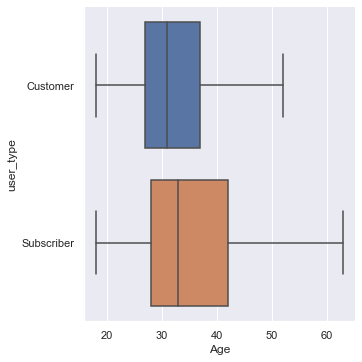

In [56]:
sns.catplot(x = 'Age', y = 'user_type', data = gendered_rides, kind = 'box', whis = 1.5, sym = '')

This shows that subscribers tend to be older than customers and that the spread of ages is larger as well. 
We will look below at whether these differences change when the data is seperated furter by gender. 

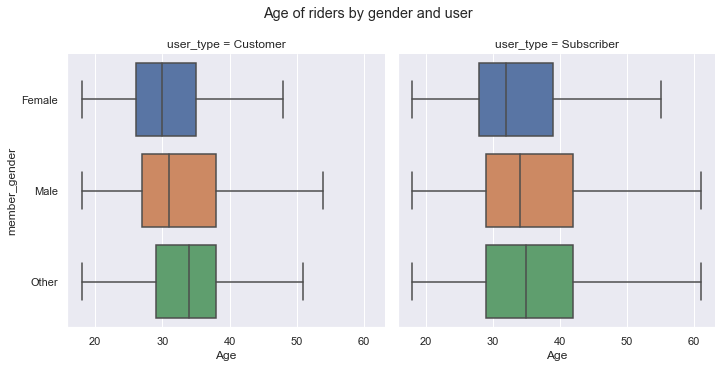

In [57]:
rp4 = sns.catplot(x = 'Age', y = 'member_gender', data = gendered_rides, col = 'user_type', kind = 'box', whis = 1.5, sym = '')

rp4.fig.subplots_adjust(top=0.85) # adjust the Figure in rp
rp4.fig.suptitle('Age of riders by gender and user')

rp4.fig.savefig('age_of_riders_by_gender_and_user')

We will analyse this once we have the values to compare from the tables below.

In [58]:
aggfunctions = [lambda x: np.nanpercentile(x, 10), lambda x: np.nanpercentile(x, 25), lambda x: np.nanpercentile(x, 50), lambda x: np.nanpercentile(x, 75), lambda x: np.nanpercentile(x, 90), np.mean, np.std]



grouped_percentiles = gendered_rides.groupby(['user_type', 'member_gender'])['Age'].agg(aggfunctions)

grouped_percentiles.rename(columns = {'<lambda_0>': '10th percentile', '<lambda_1>': '25th percentile', '<lambda_2>' : '50th percentile', '<lambda_3>' : '75th percentile', '<lambda_4>' : '90th percentile'})

10th percentile  25th percentile  50th percentile  \
user_type  member_gender                                                      
Customer   Female                    22.0             26.0             30.0   
           Male                      23.0             27.0             31.0   
           Other                     25.0             29.0             34.0   
Subscriber Female                    24.0             28.0             32.0   
           Male                      25.0             29.0             34.0   
           Other                     25.0             29.0             35.0   

                          75th percentile  90th percentile       mean  \
user_type  member_gender                                                
Customer   Female                    35.0             45.0  31.911235   
           Male                      38.0             48.0  33.527070   
           Other                     38.0             48.0  36.182219   
Subscriber Female                    39.0             49.0  34.657911   
           Male                      42.0             52.0  36.229365   
           Other                     42.0             50.0  36.976974   

                                std  
user_type  member_gender             
Customer   Female          9.323360  
           Male            9.555623  
           Other          13.941296  
Subscriber Female          9.926927  
           Male           10.684280  
           Other          12.699931

In these comparisons we can see that in all cases subscribers tend to be slightly older than users. 
We can also note that Female riders are consistently younger than Male riders and Other rides are slightly older still. 

#### Requirement 7 - 8 How has the usage of the bikes developed in the different areas (San Francisco, San Jose, Oakland)?

We will begin by looking at the frequency of starting locations and mapping these.

To do this we will begin by once again finding the number (and proportion) of rides that start at each station depending on user type. 

In [59]:
# we will be using station id to get location so we will remove rides of stationless bikes
non_stationless_rides = df[df['stationless'] == 0].copy()

# find the number of rides for each user type and start station
number_rides_by_user_and_start = non_stationless_rides.groupby(['user_type', 'start_station_id']).size().to_frame('number_of_rides_from_station').reset_index()

# add a column to tell us the percentage of all rides (by user type) that began at a given station
number_rides_by_user_and_start['Percent_of_rides'] = number_rides_by_user_and_start.groupby('user_type')['number_of_rides_from_station'].transform(lambda x: 100 * x / sum(x))

# reintroduce the information on each station location in order to graph
number_rides_by_user_and_start = number_rides_by_user_and_start.merge(stations_df, left_on = 'start_station_id', right_on = 'id')


Define a function for creating a map based on a set of coordinates given. 

This code was copied from somewhere (certainly not made by me). I will try to locate it later and reference properly.

# This has become outdated due to the decision to not work with Basemap anymore. 

def draw_map_with_stations(lon, lat, service = 'World_street_Map', savename = None, epsg = 7131, xpixels = 5000, sizes = None):
    # determine range to print based on min, max lat and lon of the data
    margin = 0.02 # buffer to add to the range
    lat_min = min(lat) - margin
    lat_max = max(lat) + margin
    lon_min = min(lon) - margin
    lon_max = max(lon) + margin
    
    fig_map = plt.figure(figsize = (8, 8))
    # create map using BASEMAP
    m = Basemap(projection='mill',
                llcrnrlon=lon_min,
                llcrnrlat=lat_min,
                urcrnrlon=lon_max,
                urcrnrlat=lat_max,
                resolution = 'l',
                epsg = epsg
                )
    m.arcgisimage(service=service, xpixels = xpixels, verbose= False)
    # convert lat and lon to map projection coordinates
    lons, lats = m(lon, lat)
    # plot points as red dots
    if sizes is not None:
        m.scatter(lons, lats, marker = 'o', s = sizes, zorder=5)
    else:
         m.scatter(lons, lats, marker = 'o', zorder=5)
            
    if savename is not None:
        fig_map.savefig(savename)

# This has become outdated due to the decision to not work with Basemap anymore. 

set up the variables for the draw_map_with_stations function
lon1 = number_rides_by_user_and_start['common_long'].values
lat1 = number_rides_by_user_and_start['common_lat'].values
siz1 = number_rides_by_user_and_start['Percent_of_rides']

draw_map_with_stations(lon1, lat1, sizes = siz1, savename = 'all_stations_by_use_street_view')

From this we can see that there are three distinct areas that the bikes are hired from.
The most popular of thiese is the San Francisco area (based on the larger size of the points) whilst the least popular is the San Jose area. 
We will thus add the following columns to the data:
region_0 will be San Francisco
region_1 will be Oakland area
region_2 will be San Jose area.

In [60]:
conditions = [stations_df['common_long'].between(-122.5, -122.35), 
              stations_df['common_long'].between(-122.35, -122.1),
              stations_df['common_long'].between(-122.1, -120.0)]

choices = [0, 1, 2]
stations_df['region'] = np.select(conditions, choices)


In [61]:
# creating a new df which reintroduces information on the starting locations
rides_with_start_region = df.merge(stations_df, left_on = 'start_station_id', right_index = True)

Lets now look at how the number of rides in different regions has changed over time.

In [62]:
# finding the number of rides per day/region/user type
region_by_day_users = rides_with_start_region.groupby(['date', 'region', 'user_type']).size().to_frame('Number_of_rides').reset_index()

# separating these out into different data frames for graphing
region_by_day_customers = region_by_day_users[region_by_day_users['user_type'] == 'Customer']
region_by_day_subscribers = region_by_day_users[region_by_day_users['user_type'] == 'Subscriber']

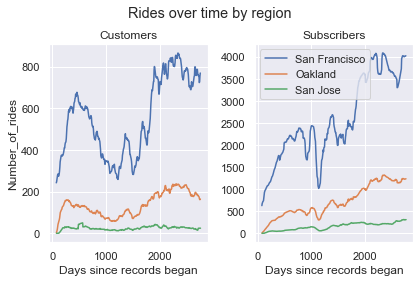

In [67]:
(fig_regions_use, ax) = plt.subplots(nrows = 1, ncols = 2)

regions = ['San Francisco', 'Oakland', 'San Jose']

# As before I initially tried to automate this using an iterator but this caused a number of errors
# that I could not fix. 

for region in [0, 1, 2]:
    rides = region_by_day_customers[region_by_day_customers['region'] == region]['Number_of_rides']
    rides.rolling(window = 14).mean().plot(label = regions[region], ax = ax[0])

ax[0].set_ylabel('Number_of_rides')
ax[0].set_xlabel('Days since records began')
ax[0].set_title('Customers')

for region in [0, 1, 2]:
    rides = region_by_day_subscribers[region_by_day_subscribers['region'] == region]['Number_of_rides']
    rides.rolling(window = 14).mean().plot(label = regions[region], ax = ax[1])

ax[1].set_xlabel('Days since records began')
ax[1].set_title('Subscribers')


fig_regions_use.tight_layout()
fig_regions_use.subplots_adjust(top=0.85) # adjust the Figure in rp
fig_regions_use.suptitle('Rides over time by region')

plt.legend()

fig_regions_use.savefig('Rides_over_time_by_region')

Here we can see that the number of rides by subscribers is generally climbing across all regions (if we ignore the dip for the winter months) since records began.
Customers use however seems to show a lot less progress in San Jose where there has been minimal increase over the time period.

Let us now zoom in on the earlier graph to take a look at the areas in more detail.
To do this we will want to compare customers' and subscribers' use across the same region and using multiple axes for the same figure will be necessary here. 
To do this we will adjust the function for drawing maps defined earlier so that it accepts an axis as a variable. 

# This has become outdated due to the decision to not work with Basemap anymore. 



 create new function that takes in the axis as a variable
 
 
def draw_map_with_stations_with_axis(lon, lat, axis, service = 'World_street_Map', savename = None, epsg = 7131, xpixels = 5000, sizes = None):
    # determine range to print based on min, max lat and lon of the data
    margin = 0.02 # buffer to add to the range
    lat_min = min(lat) - margin
    lat_max = max(lat) + margin
    lon_min = min(lon) - margin
    lon_max = max(lon) + margin
    
    # create map using BASEMAP
    m = Basemap(projection='mill',
                llcrnrlon=lon_min,
                llcrnrlat=lat_min,
                urcrnrlon=lon_max,
                urcrnrlat=lat_max,
                resolution = 'l',
                epsg = epsg,
                ax = axis
                )
    m.arcgisimage(service=service, xpixels = xpixels, verbose= False)
    # convert lat and lon to map projection coordinates
    lons, lats = m(lon, lat)
    # plot points as red dots
    if sizes is not None:
        m.scatter(lons, lats, marker = 'o', s = sizes, zorder=5)
    else:
        m.scatter(lons, lats, marker = 'o', zorder=5)
            
    if savename is not None:
        fig_map.savefig(savename)

We now want to add a column for region to the number_rides_by_user_and_start df defined earlier.
Rather than remerging with stations_df we will simply add the regions column in the same way that it was added to stations_df.

In [64]:
conditions = [number_rides_by_user_and_start['common_long'].between(-122.5, -122.35), 
              number_rides_by_user_and_start['common_long'].between(-122.35, -122.1),
              number_rides_by_user_and_start['common_long'].between(-122.1, -120.0)]

choices = [0, 1, 2]

number_rides_by_user_and_start['region'] = np.select(conditions, choices)


We will now make the plot for the first region.
As before, this will initially automated but this continued to produce errors so the version used now is separated by region.

# This has become outdated due to the decision to not work with Basemap anymore. 


user_types = ['Customer', 'Subscriber']
regions_names = ['San Francisco', 'Oakland', 'San Jose']

for j in [0]:
    fig, ax = plt.subplots(1, 2)
    fig.set_size_inches(20, 20)
    for i in [0, 1]:
        df_for_plot = number_rides_by_user_and_start[(number_rides_by_user_and_start['user_type'] == user_types[i]) & (number_rides_by_user_and_start['region'] == j)]
        lon1 = df_for_plot['common_long'].values
        lat1 = df_for_plot['common_lat'].values
        siz1 = df_for_plot['Percent_of_rides']
        draw_map_with_stations_with_axis(lon1, lat1, ax[i], sizes = 10*siz1)
        ax[i].title.set_text(user_types[i])
    
    
    # filename = ('Starting_locations_in_{}'.format(regions[j]))
    # fig.savefig(filename)
        

Adjust and save Region_0 plot

# This has become outdated due to the decision to not work with Basemap anymore. 



adjust the aesthetics of the plot and save it


ax[1].set_title('Subscribers', size = 20)
ax[0].set_title('Customers', size = 20)
fig.subplots_adjust(top=1)
fig.savefig('Region_0_all_rides_by_user', bbox_inches = 'tight', pad_inches = 0)

The plot shows that the usage of customers and subscribers is slightly different in terms of locations. We can see that the hotspot locations for customers take a large percentage of the rides thatn the hotspot locations for subscribers. 
This graph shows the same results that we were seeing earlier in our analysis of the most popular stations, it just visualises the data to make it easier to interpret. 

Make Region_1 plot

# This has become outdated due to the decision to not work with Basemap anymore. 


for j in [1]:
    fig, ax = plt.subplots(1, 2)
    fig.set_size_inches(20, 20)
    for i in [0, 1]:
        df_for_plot = number_rides_by_user_and_start[(number_rides_by_user_and_start['user_type'] == user_types[i]) & (number_rides_by_user_and_start['region'] == j)]
        lon1 = df_for_plot['common_long'].values
        lat1 = df_for_plot['common_lat'].values
        siz1 = df_for_plot['Percent_of_rides']
        draw_map_with_stations_with_axis(lon1, lat1, ax[i], sizes = 50*siz1)
        ax[i].title.set_text(user_types[i])
    
    
    # filename = ('Starting_locations_in_{}'.format(regions[j]))
    # fig.savefig(filename)
        

Adjust and save region_1 plot

# This has become outdated due to the decision to not work with Basemap anymore. 


adjust the aesthetics of the plot and save it


ax[1].set_title('Subscribers', size = 20)
ax[0].set_title('Customers', size = 20)
fig.subplots_adjust(top=1)
fig.savefig('Region_1_all_rides_by_user', bbox_inches = 'tight', pad_inches = 0)

As above the results here are just a clearer visualisation of the results that we saw earlier when examining which stations were the most popular. 